https://markov-clustering.readthedocs.io/en/latest/readme.html

# Markov Clustering

In this notebook, we will do all the analysis relative to the Markov Clustering including the clustering (by cluster and by objects) and the extraction of some metrics.

In [ ]:
#pip install markov_clustering "drawing"

In [ ]:
#pip install markov_clustering
#pip install -U scikit-learn
#!python -m pip install scipy

In [162]:
import pandas as pd
import numpy as np
import markov_clustering as mc
import networkx as nx
import random

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.spatial import distance
from scipy.spatial.distance import cdist

# By cluster

The clusters have been previously extacted from Léopold's work on GNN.

In [2]:
df = pd.read_csv('./data/data_graph.csv', sep=',')
df = df.set_index('name')
df.loc['cAD_A1800595']

,objects_type,nb of clusters,total area,total nb nodes,total nb edges,silhouette score,Dunn index,cluster index,size (nb nodes),nb edges,area,density,mean_degree,centroid x,centroid y,dispersion,diameter,radius,inertia
name,,,,,,,,,,,,,,,,,,,
cAD_A1800595,P,1,674759.907097,32,75.0,0.458996,0.067373,0,32,75.0,674759.907097,0.000047,4.687500,12792.907375,8066.422209,238.805424,1074.636602,439.240341,7.998723e+06
cAD_A1800595,T,3,961279.516134,28,57.0,0.324466,0.039607,0,3,3.0,35226.815949,0.000085,2.000000,12676.105790,9495.201640,44.284704,216.771163,179.180674,1.022005e+05
cAD_A1800595,T,3,961279.516134,28,57.0,0.324466,0.039607,1,22,51.0,882993.832916,0.000025,4.636364,12552.208007,8169.573083,170.632448,878.353596,492.937395,5.986260e+06
cAD_A1800595,T,3,961279.516134,28,57.0,0.324466,0.039607,2,3,3.0,43058.867269,0.000070,2.000000,13983.870667,8057.004035,40.133107,251.290095,197.356784,1.216811e+05


In [3]:
df.index.unique()

Index(['cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589', 'cAD_A1800590',
       'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595', 'cAD_A1800596',
       'rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121',
       'rpAD_A1702126'],
      dtype='object', name='name')

In [4]:
n = 'rpAD_A1702126'

# Example with one slide (NP)

In [5]:
df_NP = df.loc[n]
df_NP = df_NP[df_NP['objects_type'] == 'P']

# Define the position variable
positions = {}

df_positions_NFT = df_NP.copy()
df_positions_NFT.reset_index(inplace=True)
df_positions_NFT = df_positions_NFT[['centroid x','centroid y']].copy()

for index, row in df_positions_NFT.iterrows():
    positions[index] = (row['centroid x'], row['centroid y'])

# number of nodes to use
numnodes = df_NP.iloc[0,1]

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 2500, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_array(network)

result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

#mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

# Example with one slide (NFT)

In [6]:
df_NFT = df.loc[n]
df_NFT = df_NFT[df_NFT['objects_type'] == 'T']

# Define the position variable
positions = {}

df_positions_NFT = df_NFT.copy()
df_positions_NFT.reset_index(inplace=True)
df_positions_NFT = df_positions_NFT[['centroid x','centroid y']].copy()

for index, row in df_positions_NFT.iterrows():
    positions[index] = (row['centroid x'], row['centroid y'])

# number of nodes to use
numnodes = df_NFT.iloc[0,1]

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 2500, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_array(network)

result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

#mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

In [7]:
result = mc.run_mcl(matrix, inflation=1.4)
clusters = mc.get_clusters(result)
#mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

In [8]:
# Define the position variable
positions = {}

df_positions_NFT = df_NFT.copy()
df_positions_NFT.reset_index(inplace=True)
df_positions_NFT = df_positions_NFT[['centroid x','centroid y']].copy()

for index, row in df_positions_NFT.iterrows():
    positions[index] = (row['centroid x'], row['centroid y'])

dist_values = []
for index in range(len(positions)):
    a = np.array(positions[index])
for index_bis in range(len(positions)):
    b = np.array(positions[index_bis])
    dist =np.linalg.norm(a-b)
    if dist > 0 and dist not in dist_values:
        dist_values.append(dist)

#print(dist_values)
median = np.median(dist_values)
#print(median)
mean = np.mean(dist_values)
print(mean)

# number of nodes to use
numnodes = df_NFT.iloc[0,1]

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, median, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_array(network)

4540.78318342743


# By objects

## NPs

# Example with one slide (NP)

In [9]:
df_object_NP = pd.read_csv('./data/NP_x_y.csv', sep=',')
df_object_NP = df_object_NP.set_index('Name')
df_object_NP

,NP Centroid X,NP Centroid Y
Name,,
rpAD_A1702073,11140.435865,5007.713429
rpAD_A1702073,9362.589238,4481.327797
rpAD_A1702073,9876.612074,4777.696178
rpAD_A1702073,11222.714907,4558.737449
rpAD_A1702073,8579.168891,4090.298471
...,...,...
cAD_A1800596,5037.452870,4180.618827
cAD_A1800596,5251.997685,3892.654927
cAD_A1800596,5548.379181,4288.107656


In [10]:
list_names = df_object_NP.index.unique()

In [11]:
n = 'cAD_A1800596'

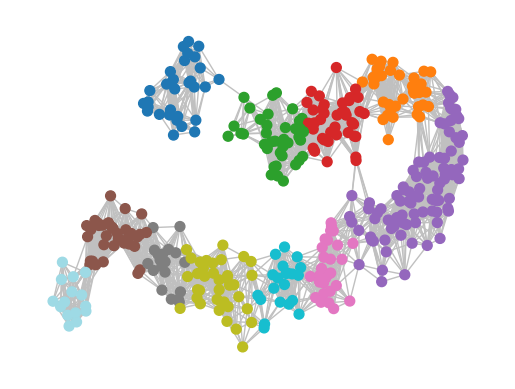

In [12]:
df_NP = df_object_NP.loc[n]
#df_NP = df_NP[df_NP['objects_type'] == 'P']

# Define the position variable
positions = {}

df_positions_NP = df_NP.copy()
df_positions_NP.reset_index(inplace=True)
df_positions_NP = df_positions_NP[['NP Centroid X','NP Centroid Y']].copy()

for index, row in df_positions_NP.iterrows():
    positions[index] = (row['NP Centroid X'], row['NP Centroid Y'])

# number of nodes to use
numnodes = len(df_NP.loc[df_NP.index == n])

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 900, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_array(network)

result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

# NPs Metrics

The following work will be done only on the clustering by objects as we decided that this was the most apropriate.

In [13]:
# Will contain the global results of MC for NPs
MC_results_NP = df_object_NP.copy()
MC_results_NP

,NP Centroid X,NP Centroid Y
Name,,
rpAD_A1702073,11140.435865,5007.713429
rpAD_A1702073,9362.589238,4481.327797
rpAD_A1702073,9876.612074,4777.696178
rpAD_A1702073,11222.714907,4558.737449
rpAD_A1702073,8579.168891,4090.298471
...,...,...
cAD_A1800596,5037.452870,4180.618827
cAD_A1800596,5251.997685,3892.654927
cAD_A1800596,5548.379181,4288.107656


## Silhouette Score

In [14]:
def MC_NPs(n):
    df_NP = df_object_NP.loc[n]

    positions = {}
    df_positions_NP = df_NP.copy()
    df_positions_NP.reset_index(inplace=True)
    df_positions_NP = df_positions_NP[['NP Centroid X','NP Centroid Y']].copy()

    for index, row in df_positions_NP.iterrows():
        positions[index] = (row['NP Centroid X'], row['NP Centroid Y'])

    numnodes = len(df_NP.loc[df_NP.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    silhouette = silhouette_score(matrix.toarray(), cluster_labels)
    return silhouette


silhouette_NP_list = []
for n in list_names:
    silhouette = MC_NPs(n)
    silhouette_NP_list.append(silhouette)
    

silhouette_NP_list

[0.03173682158123263,
 0.12321307052939175,
 0.036538524344867415,
 0.1786357926538936,
 0.0566834117930603,
 0.1357509851810667,
 0.19586314152893725,
 0.03670194154979456,
 0.09245548641599989,
 0.17614576296904985,
 0.1374851805245037,
 0.17575697602642215,
 0.21640561831479335]

In [15]:
# Add silhouette results to MC_results_NP
silhouette_NP_df = pd.DataFrame(list_names)
silhouette_NP_df = silhouette_NP_df.set_index('Name')
silhouette_NP_df['silhouette_NP'] = silhouette_NP_list
MC_results_NP = MC_results_NP.join(silhouette_NP_df)

#MC_results_NP

## Davies Bouldin Score

In [16]:
def MC_NPs(n):
    df_NP = df_object_NP.loc[n]

    positions = {}
    df_positions_NP = df_NP.copy()
    df_positions_NP.reset_index(inplace=True)
    df_positions_NP = df_positions_NP[['NP Centroid X','NP Centroid Y']].copy()

    for index, row in df_positions_NP.iterrows():
        positions[index] = (row['NP Centroid X'], row['NP Centroid Y'])

    numnodes = len(df_NP.loc[df_NP.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    db_index = davies_bouldin_score(matrix.toarray(), cluster_labels)
    return db_index


db_index_NP_list = []
for n in list_names:
    db_index = MC_NPs(n)
    db_index_NP_list.append(db_index)
    

db_index_NP_list

[1.2794094705471115,
 1.3672171439738976,
 1.4786503165674014,
 1.2874384052221914,
 1.2073787911772842,
 1.179705618985911,
 1.527619016562276,
 1.3956357795820988,
 1.6114300818007112,
 1.5141897379720795,
 1.6449004058071477,
 0.9881908313829643,
 1.6236053790824583]

In [17]:
# Add Davies Bouldin Score results to MC_results_NP
db_index_NP_df = pd.DataFrame(list_names)
db_index_NP_df = db_index_NP_df.set_index('Name')
db_index_NP_df['db_index_NP'] = db_index_NP_list
MC_results_NP = MC_results_NP.join(db_index_NP_df)
#MC_results_NP

## Calinski Harabasz Score

In [18]:
def MC_NPs(n):
    df_NP = df_object_NP.loc[n]

    positions = {}
    df_positions_NP = df_NP.copy()
    df_positions_NP.reset_index(inplace=True)
    df_positions_NP = df_positions_NP[['NP Centroid X','NP Centroid Y']].copy()

    for index, row in df_positions_NP.iterrows():
        positions[index] = (row['NP Centroid X'], row['NP Centroid Y'])

    numnodes = len(df_NP.loc[df_NP.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    ch_index = calinski_harabasz_score(matrix.toarray(), cluster_labels)
    return ch_index


ch_index_NP_list = []
for n in list_names:
    ch_index = MC_NPs(n)
    ch_index_NP_list.append(ch_index)
    

ch_index_NP_list

[4.585054228305996,
 23.07628898415541,
 6.503137965855795,
 21.305608019021133,
 4.461235216819971,
 13.137227700509168,
 53.15239061058235,
 14.91240383477757,
 20.73775611355522,
 24.98476013093942,
 67.75091991188359,
 2.547612920891458,
 32.954023417769164]

In [19]:
# Add Calinski Harabasz Score results to MC_results_NP
ch_index_NP_df = pd.DataFrame(list_names)
ch_index_NP_df = ch_index_NP_df.set_index('Name')
ch_index_NP_df['ch_index_NP'] = ch_index_NP_list
MC_results_NP = MC_results_NP.join(ch_index_NP_df)
#MC_results_NP

# Example with one slide (NFT)

In [20]:
df_object_NFT = pd.read_csv('./data/NFT_x_y.csv', sep=',')
df_object_NFT = df_object_NFT.set_index('Name')
df_object_NFT

,NFT Centroid X,NFT Centroid Y
Name,,
rpAD_A1702073,13108.939843,7890.448858
rpAD_A1702073,14169.277829,7886.467790
rpAD_A1702073,14194.050013,6989.400512
rpAD_A1702073,13047.009381,6753.632830
rpAD_A1702073,14525.377986,6151.164570
...,...,...
cAD_A1800596,7408.504842,4323.494925
cAD_A1800596,7050.192884,4143.019854
cAD_A1800596,7078.946312,4020.933777


In [39]:
n = 'rpAD_A1702073'

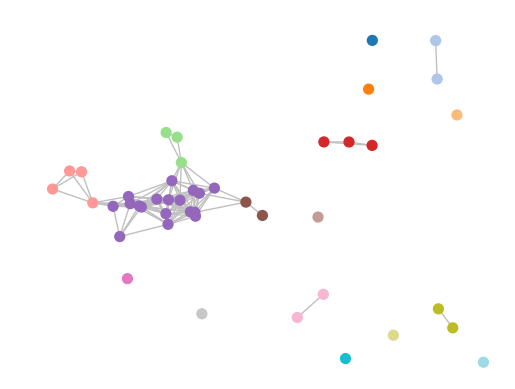

In [40]:
df_NFT = df_object_NFT.loc[n]
#df_NP = df_NP[df_NP['objects_type'] == 'P']

# Define the position variable
positions = {}

df_positions_NFT = df_NFT.copy()
df_positions_NFT.reset_index(inplace=True)
df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

for index, row in df_positions_NFT.iterrows():
    positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

# number of nodes to use
numnodes = len(df_NFT.loc[df_NFT.index == n])

# use networkx to generate the graph
network = nx.random_geometric_graph(numnodes, 900, pos=positions)

# then get the adjacency matrix (in sparse form)
matrix = nx.to_scipy_sparse_array(network)

result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters

mc.draw_graph(matrix, clusters, pos=positions, node_size=50, with_labels=False, edge_color="silver")

# NFTs Metrics

In [23]:
# Will contain the global results of MC for NPs
MC_results_NFT = df_object_NFT.copy()
MC_results_NFT

,NFT Centroid X,NFT Centroid Y
Name,,
rpAD_A1702073,13108.939843,7890.448858
rpAD_A1702073,14169.277829,7886.467790
rpAD_A1702073,14194.050013,6989.400512
rpAD_A1702073,13047.009381,6753.632830
rpAD_A1702073,14525.377986,6151.164570
...,...,...
cAD_A1800596,7408.504842,4323.494925
cAD_A1800596,7050.192884,4143.019854
cAD_A1800596,7078.946312,4020.933777


## Silhouette Score

In [24]:
def MC_NFTs(n):
    df_NFT = df_object_NFT.loc[n]

    positions = {}
    df_positions_NFT = df_NFT.copy()
    df_positions_NFT.reset_index(inplace=True)
    df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

    for index, row in df_positions_NFT.iterrows():
        positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

    numnodes = len(df_NFT.loc[df_NFT.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    silhouette = silhouette_score(matrix.toarray(), cluster_labels)
    return silhouette


silhouette_NFT_list = []
for n in list_names:
    silhouette = MC_NFTs(n)
    silhouette_NFT_list.append(silhouette)
    

silhouette_NFT_list

[-0.022609548269029504,
 0.23893123564932334,
 0.1653195390889783,
 0.16033955367923722,
 0.15693582706017947,
 0.1561260764832479,
 0.19985062053024613,
 0.22115472190284843,
 0.1301446157130592,
 0.05038912760149924,
 0.14056884211673057,
 0.061892122879807984,
 0.20165909083088648]

In [25]:
# Add silhouette results to MC_results_NFT
silhouette_NFT_df = pd.DataFrame(list_names)
silhouette_NFT_df = silhouette_NFT_df.set_index('Name')
silhouette_NFT_df['silhouette_NFT'] = silhouette_NFT_list
MC_results_NFT = MC_results_NFT.join(silhouette_NFT_df)

#MC_results_NFT

## Davies Bouldin Score

In [26]:
def MC_NFTs(n):
    df_NFT = df_object_NFT.loc[n]

    positions = {}
    df_positions_NFT = df_NFT.copy()
    df_positions_NFT.reset_index(inplace=True)
    df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

    for index, row in df_positions_NFT.iterrows():
        positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

    numnodes = len(df_NFT.loc[df_NFT.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    db_index = davies_bouldin_score(matrix.toarray(), cluster_labels)
    return db_index


db_index_NFT_list = []
for n in list_names:
    db_index = MC_NFTs(n)
    db_index_NFT_list.append(db_index)

db_index_NFT_list

[1.183176649952619,
 1.450343505127691,
 1.62241270127878,
 1.4850732796637411,
 1.5242974891342003,
 1.5358100197029136,
 1.62221315501984,
 1.6143172872031895,
 1.6120054317304224,
 1.5476795722723196,
 1.6221807500542789,
 1.400017453066242,
 1.4731679481685391]

In [27]:
# Add Davies Bouldin Score results to MC_results_NFT
db_index_NFT_df = pd.DataFrame(list_names)
db_index_NFT_df = db_index_NFT_df.set_index('Name')
db_index_NFT_df['db_index_NFT'] = db_index_NFT_list
MC_results_NFT = MC_results_NFT.join(db_index_NFT_df)
#MC_results_NFT

## Calinski Harabasz Score

In [28]:
def MC_NFTs(n):
    df_NFT = df_object_NFT.loc[n]

    positions = {}
    df_positions_NFT = df_NFT.copy()
    df_positions_NFT.reset_index(inplace=True)
    df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

    for index, row in df_positions_NFT.iterrows():
        positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

    numnodes = len(df_NFT.loc[df_NFT.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    ch_index = calinski_harabasz_score(matrix.toarray(), cluster_labels)
    return ch_index


ch_index_NFT_list = []
for n in list_names:
    ch_index = MC_NFTs(n)
    ch_index_NFT_list.append(ch_index)
ch_index_NFT_list

[1.7855460992907803,
 77.41814197747384,
 104.25893509164989,
 70.51216212736692,
 21.217803759395103,
 80.982051999413,
 100.19327775813426,
 80.46456509313896,
 120.81893524402649,
 67.63015293666605,
 103.06378788240673,
 3.126966230108946,
 71.26290593836174]

In [29]:
# Add Calinski Harabasz Score results to MC_results_NFT
ch_index_NFT_df = pd.DataFrame(list_names)
ch_index_NFT_df = ch_index_NFT_df.set_index('Name')
ch_index_NFT_df['ch_index_NFT'] = ch_index_NFT_list
MC_results_NFT = MC_results_NFT.join(ch_index_NFT_df)
#MC_results_NFT

In [30]:
#MC_results_NFT.to_csv('./data/MC_results_NFT.csv', index=True)
#MC_results_NP.to_csv('./data/MC_results_NP.csv', index=True)

# Other metrics

## 1. Number of nodes

In [31]:
def MC_numnodes_NFTs(n):
    df_NFT = df_object_NFT.loc[n]

    positions = {}
    df_positions_NFT = df_NFT.copy()
    df_positions_NFT.reset_index(inplace=True)
    df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

    for index, row in df_positions_NFT.iterrows():
        positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

    numnodes = len(df_NFT.loc[df_NFT.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    return numnodes


numnodes_NFT_list = []
for n in list_names:
    numnodes = MC_numnodes_NFTs(n)
    numnodes_NFT_list.append(numnodes)
    

# Add numnodes results to MC_results_NFT
numnodes_NFT_df = pd.DataFrame(list_names)
numnodes_NFT_df = numnodes_NFT_df.set_index('Name')
numnodes_NFT_df['numnodes_NFT'] = numnodes_NFT_list
MC_results_NFT = MC_results_NFT.join(numnodes_NFT_df)
#MC_results_NFT

In [32]:
def MC_numnodes_NPs(n):
    df_NP = df_object_NP.loc[n]

    positions = {}
    df_positions_NP = df_NP.copy()
    df_positions_NP.reset_index(inplace=True)
    df_positions_NP = df_positions_NP[['NP Centroid X','NP Centroid Y']].copy()

    for index, row in df_positions_NP.iterrows():
        positions[index] = (row['NP Centroid X'], row['NP Centroid Y'])

    numnodes = len(df_NP.loc[df_NP.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    return numnodes


numnodes_NP_list = []
for n in list_names:
    numnodes = MC_numnodes_NPs(n)
    numnodes_NP_list.append(numnodes)
    

# Add numnodes results to MC_results_NFT
numnodes_NP_df = pd.DataFrame(list_names)
numnodes_NP_df = numnodes_NP_df.set_index('Name')
numnodes_NP_df['numnodes_NP'] = numnodes_NP_list
MC_results_NP = MC_results_NP.join(numnodes_NP_df)
#MC_results_NP

## 2. Number of clusters

In [33]:
def MC_n_cluster_NFTs(n):
    df_NFT = df_object_NFT.loc[n]

    positions = {}
    df_positions_NFT = df_NFT.copy()
    df_positions_NFT.reset_index(inplace=True)
    df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

    for index, row in df_positions_NFT.iterrows():
        positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

    numnodes = len(df_NFT.loc[df_NFT.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    return clusters

n_cluster_NFT_list = []
for n in list_names:
    n_cluster = MC_n_cluster_NFTs(n)
    n_cluster_NFT_list.append(len(n_cluster))

# Add n_cluster results to MC_results_NFT
n_cluster_NFT_df = pd.DataFrame(list_names)
n_cluster_NFT_df = n_cluster_NFT_df.set_index('Name')
n_cluster_NFT_df['n_cluster_NFT'] = n_cluster_NFT_list
MC_results_NFT = MC_results_NFT.join(n_cluster_NFT_df)
#MC_results_NFT

In [34]:
def MC_n_cluster_NPs(n):
    df_NP = df_object_NP.loc[n]

    positions = {}
    df_positions_NP = df_NP.copy()
    df_positions_NP.reset_index(inplace=True)
    df_positions_NP = df_positions_NP[['NP Centroid X','NP Centroid Y']].copy()

    for index, row in df_positions_NP.iterrows():
        positions[index] = (row['NP Centroid X'], row['NP Centroid Y'])

    numnodes = len(df_NP.loc[df_NP.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    return clusters


n_cluster_NP_list = []
for n in list_names:
    n_cluster = MC_n_cluster_NPs(n)
    n_cluster_NP_list.append(len(n_cluster))
    

# Add nn results to MC_results_NFT
n_cluster_NP_df = pd.DataFrame(list_names)
n_cluster_NP_df = n_cluster_NP_df.set_index('Name')
n_cluster_NP_df['n_cluster_NP'] = n_cluster_NP_list
MC_results_NP = MC_results_NP.join(n_cluster_NP_df)
#MC_results_NP

## 3. Nearest Neighbor

### NP

In [180]:
MC_results_NP_dist = pd.DataFrame()

In [181]:
%%time
for n in list_names:
    
    df = MC_results_NP[MC_results_NP.index == n].copy()

    distances = cdist(df[['NP Centroid X', 'NP Centroid Y']], df[['NP Centroid X', 'NP Centroid Y']], 'euclidean')
    dist_sorted = np.sort(distances, axis = 0)
    df['min_dist'] = dist_sorted[1,:]
    MC_results_NP_dist = pd.concat([MC_results_NP_dist, df], axis = 0)
    
MC_results_NP_dist

CPU times: user 170 ms, sys: 23.8 ms, total: 194 ms
Wall time: 191 ms


,NP Centroid X,NP Centroid Y,silhouette_NP,db_index_NP,ch_index_NP,numnodes_NP,n_cluster_NP,min_dist
Name,,,,,,,,
rpAD_A1702073,11140.435865,5007.713429,0.031737,1.279409,4.585054,31,6,456.452923
rpAD_A1702073,9362.589238,4481.327797,0.031737,1.279409,4.585054,31,6,305.790544
rpAD_A1702073,9876.612074,4777.696178,0.031737,1.279409,4.585054,31,6,593.341128
rpAD_A1702073,11222.714907,4558.737449,0.031737,1.279409,4.585054,31,6,253.892692
rpAD_A1702073,8579.168891,4090.298471,0.031737,1.279409,4.585054,31,6,226.025628
...,...,...,...,...,...,...,...,...
cAD_A1800596,5037.452870,4180.618827,0.216406,1.623605,32.954023,390,11,331.465497
cAD_A1800596,5251.997685,3892.654927,0.216406,1.623605,32.954023,390,11,359.099826
cAD_A1800596,5548.379181,4288.107656,0.216406,1.623605,32.954023,390,11,264.402347


In [185]:
#MC_results_NP_dist.to_csv('./data/MC_results_NP_v3.csv', index=True)

### NFT

In [182]:
MC_results_NFT_dist = pd.DataFrame()

In [183]:
%%time
for n in list_names:
    
    df = MC_results_NFT[MC_results_NFT.index == n].copy()

    distances = cdist(df[['NFT Centroid X', 'NFT Centroid Y']], df[['NFT Centroid X', 'NFT Centroid Y']], 'euclidean')
    dist_sorted = np.sort(distances, axis = 0)
    df['min_dist'] = dist_sorted[1,:]
    MC_results_NFT_dist = pd.concat([MC_results_NFT_dist, df], axis = 0)
    
MC_results_NFT_dist

CPU times: user 1.63 s, sys: 211 ms, total: 1.84 s
Wall time: 1.85 s


,NFT Centroid X,NFT Centroid Y,silhouette_NFT,db_index_NFT,ch_index_NFT,numnodes_NFT,n_cluster_NFT,min_dist
Name,,,,,,,,
rpAD_A1702073,13108.939843,7890.448858,-0.022610,1.183177,1.785546,45,17,1060.345459
rpAD_A1702073,14169.277829,7886.467790,-0.022610,1.183177,1.785546,45,17,897.409250
rpAD_A1702073,14194.050013,6989.400512,-0.022610,1.183177,1.785546,45,17,897.409250
rpAD_A1702073,13047.009381,6753.632830,-0.022610,1.183177,1.785546,45,17,1138.501675
rpAD_A1702073,14525.377986,6151.164570,-0.022610,1.183177,1.785546,45,17,901.342178
...,...,...,...,...,...,...,...,...
cAD_A1800596,7408.504842,4323.494925,0.201659,1.473168,71.262906,887,14,128.745655
cAD_A1800596,7050.192884,4143.019854,0.201659,1.473168,71.262906,887,14,125.426353
cAD_A1800596,7078.946312,4020.933777,0.201659,1.473168,71.262906,887,14,125.426353


In [186]:
#MC_results_NFT_dist.to_csv('./data/MC_results_NFT_v3.csv', index=True)

## 4. Number of nodes per cluster

In [49]:
def MC_n_node_cluster_NFTs(n):
    df_NFT = df_object_NFT.loc[n]

    positions = {}
    df_positions_NFT = df_NFT.copy()
    df_positions_NFT.reset_index(inplace=True)
    df_positions_NFT = df_positions_NFT[['NFT Centroid X','NFT Centroid Y']].copy()

    for index, row in df_positions_NFT.iterrows():
        positions[index] = (row['NFT Centroid X'], row['NFT Centroid Y'])

    numnodes = len(df_NFT.loc[df_NFT.index == n])

    network = nx.random_geometric_graph(numnodes, 900, pos=positions)
    matrix = nx.to_scipy_sparse_array(network)

    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)

    cluster_labels = np.zeros(numnodes, dtype=int)
    cluster_mapping = {cluster_idx: label_idx for label_idx, cluster in enumerate(clusters) for cluster_idx in cluster}

    for cluster_idx, label_idx in cluster_mapping.items():
        cluster_labels[cluster_idx] = label_idx

    return clusters

i_list = []

for i in n_node_cluster:
        i_list.append(len(i))

'''
i_list = []
n_node_cluster_NFT_list = []
for n in list_names:
    n_node_cluster = MC_n_node_cluster_NFTs(n)
    for i in n_node_cluster:
        i_list.append(len(i))
    n_node_cluster_NFT_list.append(i_list)
'''

print(i_list)

[110, 34, 79, 48, 46, 44, 26, 40, 102, 70, 42, 42, 71, 133]


In [38]:
list_names

Index(['rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121',
       'rpAD_A1702126', 'cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589',
       'cAD_A1800590', 'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595',
       'cAD_A1800596'],
      dtype='object', name='Name')

In [ ]:
n_node_cluster_NFT_list = []
for n in list_names:
    n_node_cluster = MC_n_node_cluster_NFTs(n)
    n_node_cluster_NFT_list.append(len(n_node_cluster))

In [ ]:
# Add n_node_cluster results to MC_results_NFT
n_node_cluster_NFT_df = pd.DataFrame(list_names)
n_node_cluster_NFT_df = n_node_cluster_NFT_df.set_index('Name')
n_node_cluster_NFT_df['n_node_cluster_NFT'] = n_node_cluster_NFT_list
MC_results_NFT = MC_results_NFT.join(n_node_cluster_NFT_df)
MC_results_NFT

In [41]:
MC_results_NFT

,NFT Centroid X,NFT Centroid Y,silhouette_NFT,db_index_NFT,ch_index_NFT,numnodes_NFT,n_cluster_NFT
Name,,,,,,,
cAD_A1702862,1482.246796,9015.309342,0.156126,1.535810,80.982052,952,11
cAD_A1702862,1356.174068,8963.555460,0.156126,1.535810,80.982052,952,11
cAD_A1702862,1479.592633,8927.725849,0.156126,1.535810,80.982052,952,11
cAD_A1702862,1720.679076,8922.860099,0.156126,1.535810,80.982052,952,11
cAD_A1702862,1356.174068,8917.994350,0.156126,1.535810,80.982052,952,11
...,...,...,...,...,...,...,...
rpAD_A1702126,12147.863094,-6429.730524,0.156936,1.524297,21.217804,341,15
rpAD_A1702126,11812.111515,-6639.400092,0.156936,1.524297,21.217804,341,15
rpAD_A1702126,7870.237577,-6995.926825,0.156936,1.524297,21.217804,341,15
